In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

#### Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

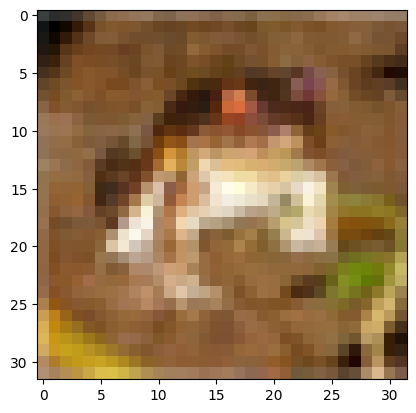

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

array([6], dtype=uint8)

In [6]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

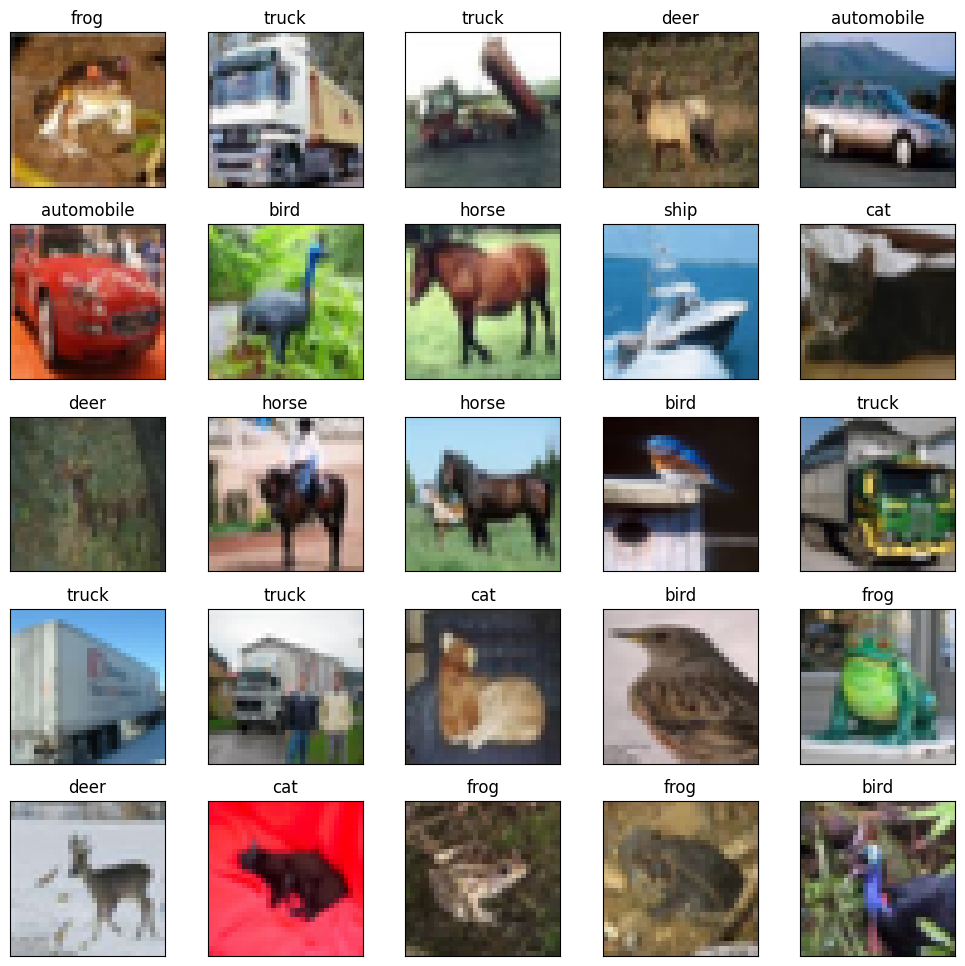

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])

plt.show()

#### Scale the data

In [8]:
x_train = x_train / 255
x_test = x_test / 255

Build the model

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, input_shape = (32,32,3), activation = 'relu', kernel_size = (3,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, activation = 'relu', kernel_size = (3,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10 , activation='softmax'))

Compile the model

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
5000/5000 [==============================] - 31s 5ms/step - loss: 1.4218 - accuracy: 0.4897
Epoch 2/10
5000/5000 [==============================] - 29s 6ms/step - loss: 1.0931 - accuracy: 0.6155
Epoch 3/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.9618 - accuracy: 0.6639
Epoch 4/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.8694 - accuracy: 0.6954
Epoch 5/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.7930 - accuracy: 0.7226
Epoch 6/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.7221 - accuracy: 0.7468
Epoch 7/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.6566 - accuracy: 0.7700
Epoch 8/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.6011 - accuracy: 0.7887
Epoch 9/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.5486 - accuracy: 0.8080
Epoch 10/10
5000/5000 [==============================] - 19s 4ms/step - l

Evalate on test data

In [12]:
model.evaluate(x_test, y_test, batch_size = 1)

10000/10000 [==============================] - 25s 2ms/step - loss: 1.1264 - accuracy: 0.6661


[1.1264100074768066, 0.666100025177002]

In [13]:
img = x_test[5885]

In [14]:
img.shape

(32, 32, 3)

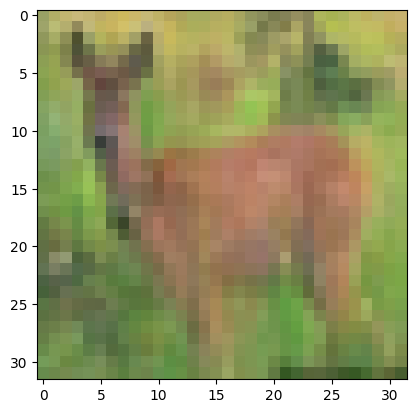

In [16]:
plt.imshow(img)

In [31]:
def predict(image):
  # image = image / 255
  image = image.reshape(1, 32, 32,3)
  prediction = model.predict(image, verbose = 0)
  i = np.argmax(prediction)
  return labels[y_train[i][0]]

In [18]:
img.shape

(32, 32, 3)

In [32]:
predict(img)

1/1 [==============================] - 0s 17ms/step


'automobile'

In [33]:
img = x_test[600]
predict(img)

1/1 [==============================] - 0s 17ms/step


'ship'

In [20]:
new_img = plt.imread('truck1.jpg')

In [21]:
new_img.shape

(32, 32, 3)

In [34]:
predict(new_img)

1/1 [==============================] - 0s 330ms/step


'truck'

In [35]:
new_img = plt.imread('deer1.jpg')
predict(new_img)

1/1 [==============================] - 0s 17ms/step


'frog'